In [27]:
# USCID:9809611234
# Name: Zhaoyang SONG

# (a)Download the Vertebral Column Data Set

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('column_2C.dat', 
                  delimiter='\s+', 
                  names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis','category'])
print (df.sample(10))

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
15              44.32        12.54                  36.10         31.78   
286             61.73        17.11                  46.90         44.62   
263             33.79         3.68                  25.50         30.11   
125             48.06         5.69                  57.06         42.37   
285             67.80        16.55                  43.26         51.25   
49              41.77        17.90                  20.03         23.87   
35              31.48         7.83                  24.28         23.66   
48              40.56        17.98                  34.00         22.58   
276             51.33        13.63                  33.26         37.69   
215             30.74        13.35                  35.90         17.39   

     pelvic_radius  grade_of_spondylolisthesis category  
15          124.12                        5.42       AB  
286         120.92                        3.09       NO  


In [30]:
df.isnull().sum()

pelvic_incidence              0
pelvic_tilt                   0
lumbar_lordosis_angle         0
sacral_slope                  0
pelvic_radius                 0
grade_of_spondylolisthesis    0
category                      0
dtype: int64

# (b)Pre-Processing and Exploratory data analysis

# i. Make scatterplots of the independent variables in the dataset. 
# Use color to show Classes 0 and 1.

In [31]:
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis','category']

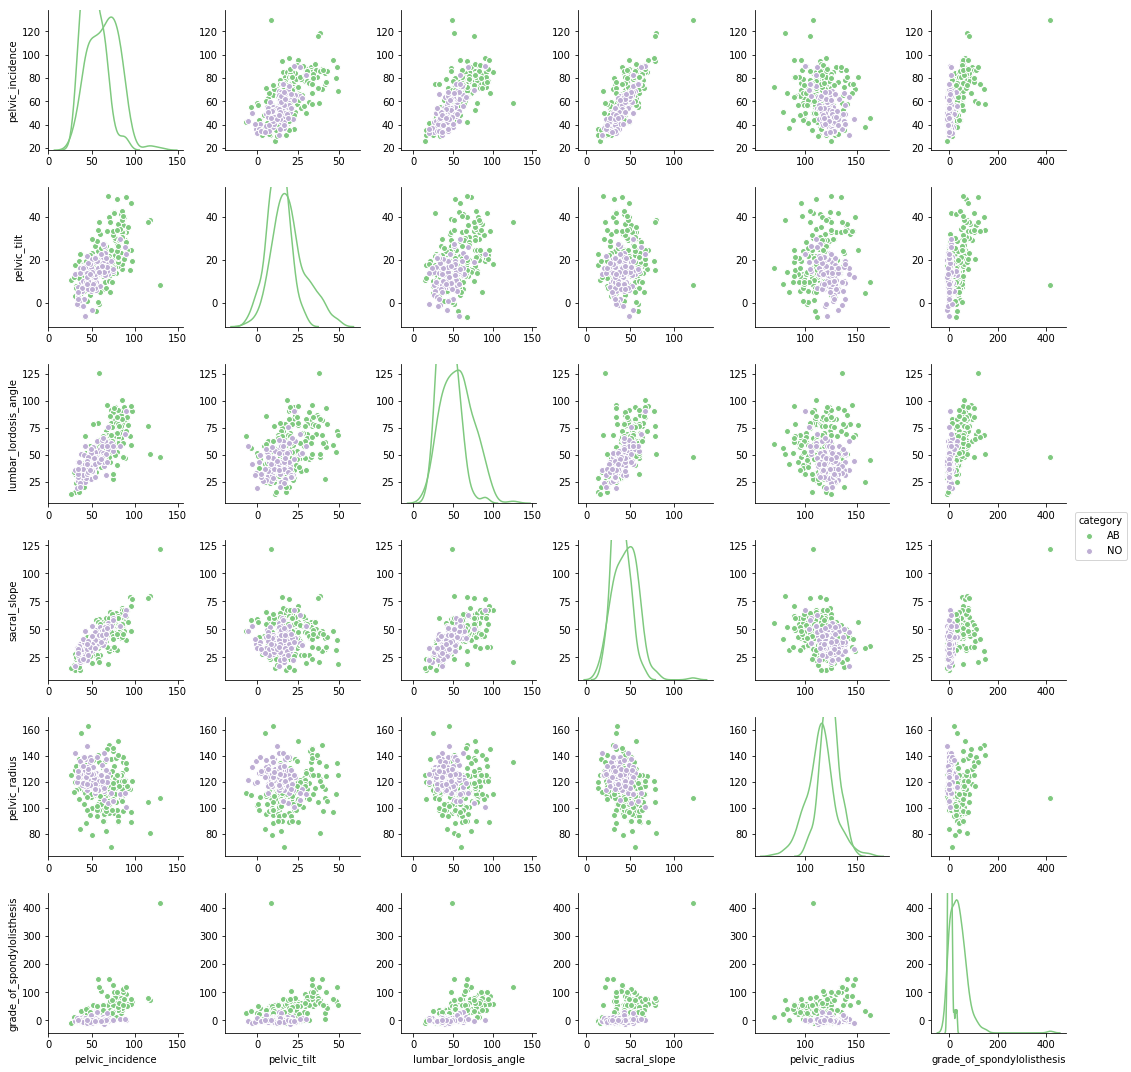

In [32]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
sb.pairplot(df,hue = 'category',diag_kind = 'kde',kind = 'scatter',palette = 'Accent')
plt.show()

# ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).


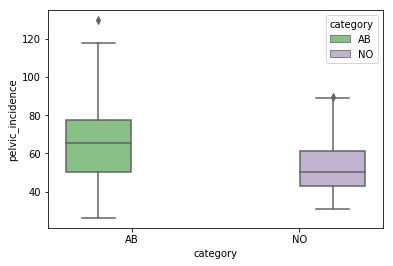

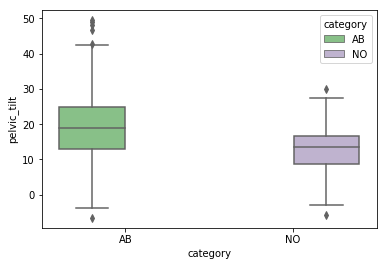

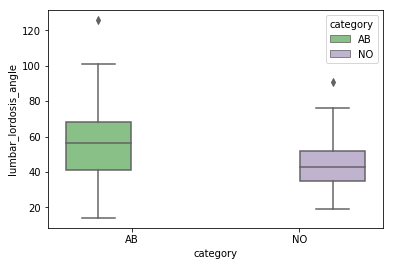

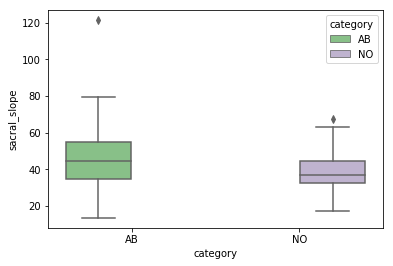

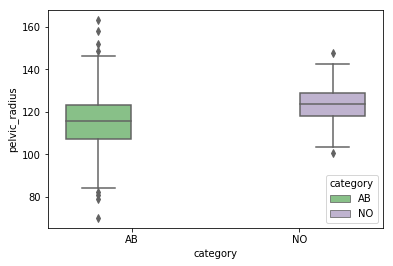

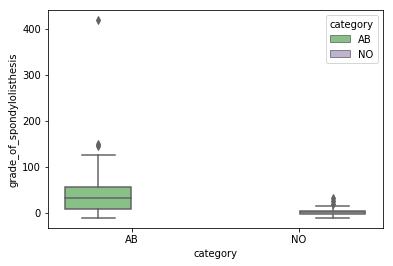

In [33]:
import seaborn as sns

ax = sns.boxplot(y="pelvic_incidence", x="category", hue="category", data=df, palette="Accent")
plt.show()
ax = sns.boxplot(y="pelvic_tilt", x="category", hue="category", data=df, palette="Accent")
plt.show()
ax = sns.boxplot(y="lumbar_lordosis_angle", x="category", hue="category", data=df, palette="Accent")
plt.show()
ax = sns.boxplot(y="sacral_slope", x="category", hue="category", data=df, palette="Accent")
plt.show()
ax = sns.boxplot(y="pelvic_radius", x="category", hue="category", data=df, palette="Accent")
plt.show()
ax = sns.boxplot(y="grade_of_spondylolisthesis", x="category", hue="category", data=df, palette="Accent")
plt.show()

# iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [34]:
df.replace('NO',0,inplace=True)
df.replace('AB',1,inplace=True)
training1=df.loc[df['category']==0]
training2=df.loc[df['category']==1]
trainingset=pd.concat([training1[0:70], training2[0:140]])

In [35]:
testset=pd.concat([training1[70:],training2[140:]])

# (c) Classification using KNN on Vertebral Column Data Set

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
train_x=trainingset[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','grade_of_spondylolisthesis']]
train_y=trainingset[['category']]
test_x=testset[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','grade_of_spondylolisthesis']]
test_y=testset[['category']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


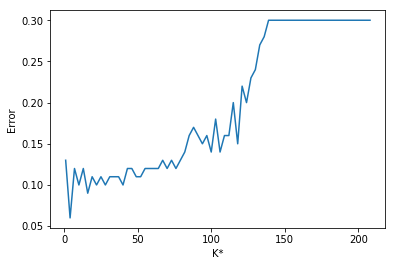

In [38]:
k_range = np.arange(1, 210, 3)
k_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(train_x, train_y)
    scores = 1 - knn.score(test_x, test_y)
    k_scores.append(scores)
    
plt.plot(k_range, k_scores)
plt.xlabel('K*')
plt.ylabel('Error')
plt.show()

In [39]:
error_least = min(k_scores)
least_location = k_scores.index(error_least)
k_range[least_location]

4

In [40]:
# so that when k=4, we get the minmize errro, which is the best k value

In [41]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_x,train_y.values.ravel())
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(test_x)

c_n=confusion_matrix(test_y, y_pred)
TN=25
FN=1
TP=69
FP=5

positive_rate=TP/(TP+FN)
negative_rate=TN/(TN+FP)

print("positive_rate is",positive_rate)
print("nagetive_rate is",negative_rate)
print(metrics.classification_report(test_y, y_pred))

positive_rate is 0.9857142857142858
nagetive_rate is 0.8333333333333334
             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210]
[0.25, 0.19999999999999996, 0.21999999999999997, 0.25, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.25, 0.21999999999999997, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002, 0.13, 0.13, 0.13, 0.099999999999999978, 0.089999999999999969, 0.089999999999999969, 0.07999999999999996]


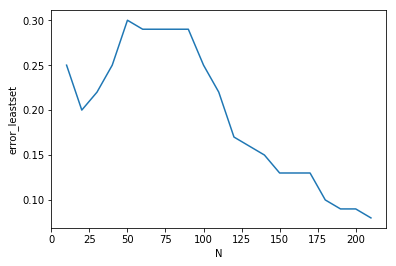

In [42]:
N_all = np.arange(10, 212, 10)
best_k_list = []
error_leastset = []

for N in N_all:
    trainingset2=pd.concat([training1[0:N//3], training2[0:(N-N//3)]])
    
    train_x2=trainingset2[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','grade_of_spondylolisthesis']]
    train_y2=trainingset2[['category']]
    test_x2=testset[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','grade_of_spondylolisthesis']]
    test_y2=testset[['category']]
    
    k_range = np.arange(1, N, 5)
    k_scores = [] 
        
    for k in k_range:
        knn = KNeighborsClassifier(k)
        knn.fit(train_x2, train_y2)
        scores = 1 - knn.score(test_x2, test_y2)
        k_scores.append(scores)

    error_least = min(k_scores)
    error_leastset.append(error_least)


print(N_all)
print(error_leastset)
plt.plot(N_all,error_leastset)
plt.xlabel('N')
plt.ylabel('error_leastset')
plt.show()

# (d) Replace the Euclidean metric

# i. Minkowski Distance:
## A. which becomes Manhattan Distance with p = 1.

In [43]:
k_range = np.arange(1, 196, 5)
k_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(train_x, train_y)
    scores = 1 - knn.score(test_x, test_y)
    k_scores.append(scores)
    
error_least = min(k_scores)
least_location = k_scores.index(error_least)
print('The best k is', k_range[least_location])
error_least = min(k_scores)
print('The least error is',error_least)

The best k is 6
The least error is 0.11


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


##  i. Minkowski Distance:
### B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [44]:
p_log_range = np.arange(0.1, 1, 0.1)
p_range = np.power(10, p_log_range)
p_scores = []
for p in p_range:
    k = 6
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
    knn.fit(train_x, train_y)
    scores = 1 - knn.score(test_x, test_y)
    p_scores.append(scores)
    
error_least = min(p_scores)
least_location = p_scores.index(error_least)
best_p = p_range[least_location]
log10_p = np.log10(best_p)

print('The least error is',error_least)
print('K is', k)
print('Log10(p) is', log10_p)

The least error is 0.06
K is 6
Log10(p) is 0.6


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


# C. which becomes Chebyshev Distance with p → ∞

In [45]:
k_range = np.arange(1, 196, 5)
k_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', p=p)
    knn.fit(train_x, train_y)
    scores = 1 - knn.score(test_x, test_y)
    k_scores.append(scores)
    
error_least = min(k_scores)
least_location = k_scores.index(error_least)
print('The best k is', k_range[least_location])
error_least = min(k_scores)
print('The least error is',error_least)

The best k is 16
The least error is 0.08


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


# ii. Mahalanobis Distance

In [46]:
k_range = np.arange(1, 196, 5)
k_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': np.linalg.pinv(train_x.cov())})
    knn.fit(train_x, train_y)
    scores = 1 - knn.score(test_x, test_y)
    k_scores.append(scores)
    
error_least = min(k_scores)
least_location = k_scores.index(error_least)
print('The best k is', k_range[least_location])
error_least = min(k_scores)
print('The least error is',error_least)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


The best k is 6
The least error is 0.08


# (e) Weighted Decision

In [47]:
k_range = np.arange(1, 196, 5)
k_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance',metric='euclidean')
    knn.fit(train_x, train_y)
    scores = 1 - knn.score(test_x, test_y)
    k_scores.append(scores)
    
error_least = min(k_scores)
least_location = k_scores.index(error_least)
print('The best k is', k_range[least_location])
error_least = min(k_scores)
print('The least error is',error_least)

The best k is 6
The least error is 0.1


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [48]:
k_range = np.arange(1, 196, 5)
k_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance',metric='minkowski', p=1)
    knn.fit(train_x, train_y)
    scores = 1 - knn.score(test_x, test_y)
    k_scores.append(scores)
    
error_least = min(k_scores)
least_location = k_scores.index(error_least)
print('The best k is', k_range[least_location])
error_least = min(k_scores)
print('The least error is',error_least)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


The best k is 26
The least error is 0.1


In [49]:
k_range = np.arange(1, 196, 5)
k_scores = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance',metric='chebyshev', p=p)
    knn.fit(train_x, train_y)
    scores = 1 - knn.score(test_x, test_y)
    k_scores.append(scores)
    
error_least = min(k_scores)
least_location = k_scores.index(error_least)
print('The best k is', k_range[least_location])
error_least = min(k_scores)
print('The least error is',error_least)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


The best k is 16
The least error is 0.11


# (F) the leaset error

In [50]:
# the least ERROR is 0.08